In [240]:
# Written by : Priyansh Garg

In [241]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Question 1 :Reading the diamond dataset

In [242]:
data = pd.read_csv("C:/Users/priya/Downloads/BITS/diamonds.csv",index_col=0)

In [243]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [244]:
data.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [245]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [246]:
data.dtypes.value_counts()

float64    6
object     3
int64      1
dtype: int64

# Question 2 : Perform Exploratory Data Analysis(EDA)

# Part a : Check for null or missing values

In [247]:
data.isnull() 

,carat,cut,color,clarity,depth,table,price,x,y,z
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
53936,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False
53939,False,False,False,False,False,False,False,False,False,False


In [248]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [249]:
# Hence, no null or missing values.

# Part b : To find numeric and non-numeric attributes

In [250]:
# As the object indicates the non-numeric attribute, so columns with True is non-numeric and columsn with False as numeric

In [251]:
non_numeric_columns = data.columns[data.dtypes == 'object']
numeric_columns = data.columns[data.dtypes != 'object']


In [252]:
print(non_numeric_columns)

Index(['cut', 'color', 'clarity'], dtype='object')


In [253]:
print(numeric_columns)

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')


# Part c : Observe value of x,y and z

In [254]:
sub_data_x_y_z = data[['x','y','z']]

In [255]:
sub_data_x_y_z

,x,y,z
1,3.95,3.98,2.43
2,3.89,3.84,2.31
3,4.05,4.07,2.31
4,4.20,4.23,2.63
5,4.34,4.35,2.75
...,...,...,...
53936,5.75,5.76,3.50
53937,5.69,5.75,3.61
53938,5.66,5.68,3.56
53939,6.15,6.12,3.74


In [256]:
sub_data_x_y_z.describe()

,x,y,z
count,53940.000000,53940.000000,53940.000000
mean,5.731157,5.734526,3.538734
std,1.121761,1.142135,0.705699
min,0.000000,0.000000,0.000000
25%,4.710000,4.720000,2.910000
50%,5.700000,5.710000,3.530000
75%,6.540000,6.540000,4.040000
max,10.740000,58.900000,31.800000


<AxesSubplot:>

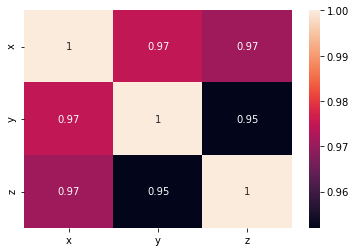

In [257]:
correlation = sub_data_x_y_z.corr() 
sns.heatmap(correlation, annot = True) 

# Part d : Plot histogram, pair plot, heatmap.

# Plot Pairplot

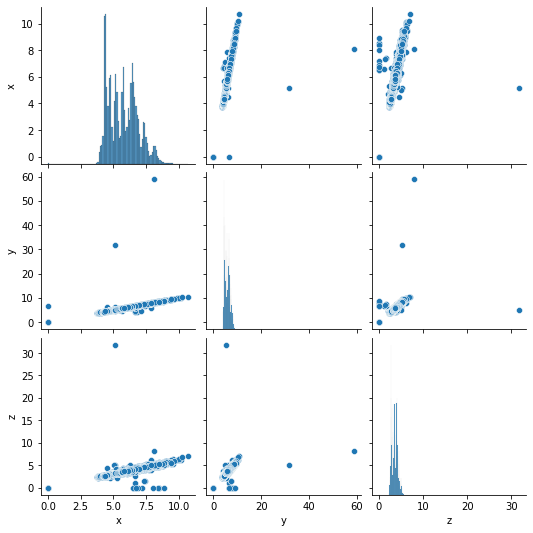

In [258]:
sns.pairplot(sub_data_x_y_z)

# Plot Histogram

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>]], dtype=object)

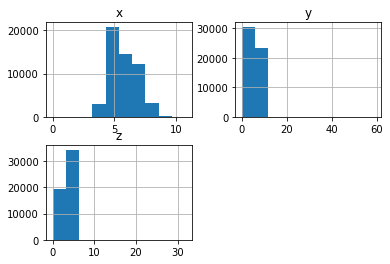

In [259]:
sub_data_x_y_z.hist()

# Plot Heatmap

<AxesSubplot:>

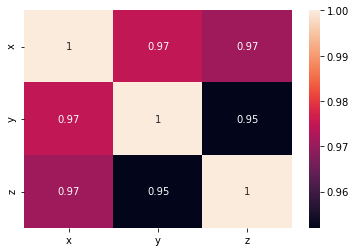

In [260]:
sns.heatmap(correlation, annot = True) 

# Question 3 :Convert non-numeric(categorical) data into numeric

In [261]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [262]:
# find out how many distinct values are ther ein  each categorical/non-numeric column

In [263]:
data["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [264]:
data["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [265]:
data["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [266]:
# We can do the label encoding of each of the categorical/non-numeric columns but it has disadvantage of it can often be misinterpreted by algorithms.
# As numeric value of 0 and numeric value of 4 has different meaning, 0 < 4 but this is not applicable in data set.

# So we go to one-hot encoding, the most preferred method

In [267]:
revised_data = pd.get_dummies(data, columns=["cut", "color","clarity"], prefix=["cut", "color","clarity"])

In [268]:
# List of columns with each cateogory as one-hot encoded that means if the value is of that category it has 1 or else 0.
# example if the cut is good then representation of it is 
# columns = ['cut_Fair','cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good']
# columval =[0,1,0,0,0]


In [269]:
revised_data.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [270]:
# Data Set to be used further

In [271]:
revised_data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


# order the columns in dataframe for separating of X and Y further

In [272]:
revised_data.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [273]:
revised_data = revised_data [['carat', 'depth', 'table', 'price', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2','x', 'y', 'z',]]

In [274]:
revised_data

,carat,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,x,y,z
1,0.23,61.5,55.0,326,0,0,1,0,0,0,...,0,0,1,0,0,0,0,3.95,3.98,2.43
2,0.21,59.8,61.0,326,0,0,0,1,0,0,...,0,1,0,0,0,0,0,3.89,3.84,2.31
3,0.23,56.9,65.0,327,0,1,0,0,0,0,...,0,0,0,1,0,0,0,4.05,4.07,2.31
4,0.29,62.4,58.0,334,0,0,0,1,0,0,...,0,0,0,0,1,0,0,4.20,4.23,2.63
5,0.31,63.3,58.0,335,0,1,0,0,0,0,...,0,0,1,0,0,0,0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53936,0.72,60.8,57.0,2757,0,0,1,0,0,1,...,0,1,0,0,0,0,0,5.75,5.76,3.50
53937,0.72,63.1,55.0,2757,0,1,0,0,0,1,...,0,1,0,0,0,0,0,5.69,5.75,3.61
53938,0.70,62.8,60.0,2757,0,0,0,0,1,1,...,0,1,0,0,0,0,0,5.66,5.68,3.56
53939,0.86,61.0,58.0,2757,0,0,0,1,0,0,...,0,0,1,0,0,0,0,6.15,6.12,3.74


# Question 4 : Extract X as all columns except the last column and Y as the last column.

In [275]:
X = revised_data.iloc[:,:-1].values
y = revised_data.iloc[:,-1].values

In [276]:
X

array([[ 0.23, 61.5 , 55.  , ...,  0.  ,  3.95,  3.98],
       [ 0.21, 59.8 , 61.  , ...,  0.  ,  3.89,  3.84],
       [ 0.23, 56.9 , 65.  , ...,  0.  ,  4.05,  4.07],
       ...,
       [ 0.7 , 62.8 , 60.  , ...,  0.  ,  5.66,  5.68],
       [ 0.86, 61.  , 58.  , ...,  0.  ,  6.15,  6.12],
       [ 0.75, 62.2 , 55.  , ...,  0.  ,  5.83,  5.87]])

In [277]:
y

array([2.43, 2.31, 2.31, ..., 3.56, 3.74, 3.64])

In [278]:
len(X)

53940

In [279]:
len(y)

53940

# Question 5 : Split the data into a training set and testing set.

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [281]:
len(X_train)

37758

In [282]:
len(y_train)

37758

In [283]:
len(X_test)

16182

# Question 6 : Perform 10-fold cross-validation. 

In [284]:
lm = LinearRegression()

In [285]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)

In [286]:
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)

In [287]:
scores

array([0.96632495, 0.9989968 , 0.99441464, 0.98137407, 0.98533111,
       0.98527986, 0.99777929, 0.99808233, 0.98030672, 0.98137873])

# Question 7 :Train a Linear regression model for the dataset. 

In [288]:
reg = LinearRegression()

In [289]:
model = reg.fit(X_train, y_train)

In [290]:
# Coefficients of independent variables (inputs)

In [291]:
model.coef_

array([ 1.13315257e-02,  5.87548271e-02,  1.41593621e-04, -7.81279696e-07,
       -1.79779436e-03, -6.50783956e-04,  2.84330142e-03, -8.31449355e-03,
        7.91977045e-03,  9.50631046e-04,  9.97091733e-04,  9.07122755e-04,
        7.37443282e-05, -3.21343747e-03, -1.38328538e-03,  1.66813299e-03,
       -8.55459355e-03,  4.76833582e-03, -1.09559106e-03, -2.18144146e-03,
        1.53311963e-03,  4.53115775e-04,  2.96870892e-03,  2.10834592e-03,
        5.39802633e-01,  7.24462743e-02])

In [292]:
# Intercept

In [293]:
model.intercept_

-3.6139244663155674

In [294]:
y_pred = model.predict(X_test)

# Question 8 :Compute the accuracy.

In [295]:
accuracy = model.score(X_test, y_test)

In [296]:
print("Accuracy of model is: {}%".format(accuracy*100))

Accuracy of model is: 89.50905937320137%


# Question 9 :Visualize training and test results. 

In [297]:
    results = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [298]:
results

,Actual,Predicted
0,3.55,3.541351
1,3.24,3.228374
2,3.27,3.270758
3,3.52,3.511331
4,4.01,4.026734
...,...,...
16177,3.77,3.774470
16178,3.16,3.152480
16179,2.72,2.753812
16180,2.96,2.970082


In [299]:
# For sample of 25 test set data

<AxesSubplot:>

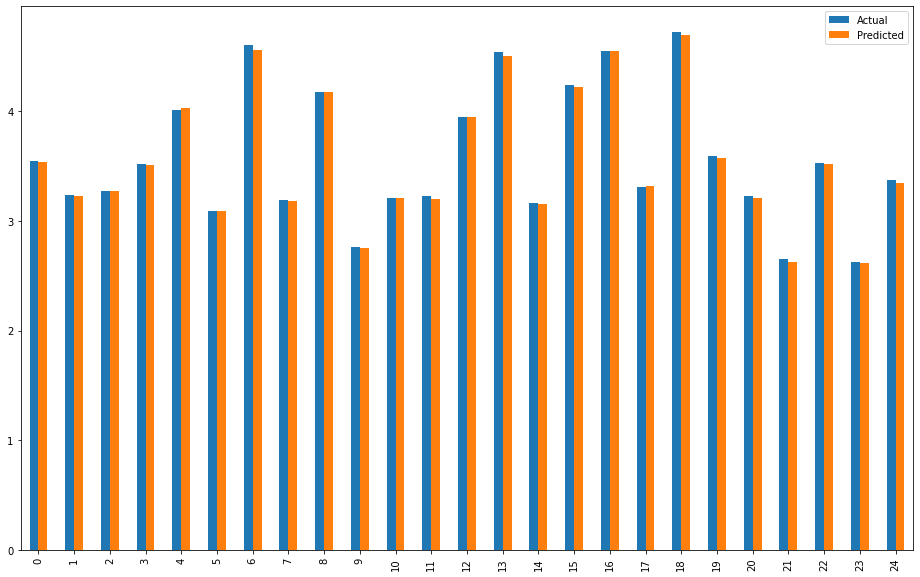

In [300]:
results_shortlist = results.head(25)
results_shortlist.plot(kind='bar',figsize=(16,10))


In [301]:
# for training data

<AxesSubplot:>

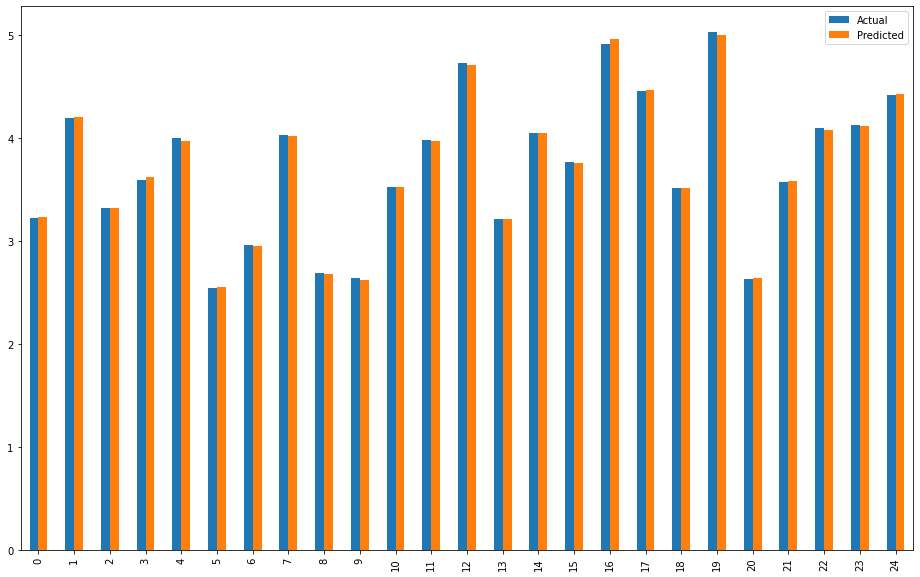

In [302]:
y_train_pred = model.predict(X_train)

results_train = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_train_pred.flatten()})
results_shortlist_train = results_train.head(25)
results_shortlist_train.plot(kind='bar',figsize=(16,10))    